In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
                                    StratifiedKFold, 
                                    cross_validate
                                    )
from sklearn.metrics import (
                            confusion_matrix, 







                            
                            f1_score,
                            accuracy_score,
                            precision_score,
                            recall_score
                            )
warnings.filterwarnings('ignore')

In [2]:
X_train = np.load("./artifacts/X_train_resampled.npz", allow_pickle=True)['arr_0']
Y_train = np.load("./artifacts/Y_train_resampled.npz", allow_pickle=True)['arr_0']
X_test = np.load('./artifacts/X_test.npz', allow_pickle=True)['arr_0']
Y_test = np.load('./artifacts/Y_test.npz', allow_pickle=True)['arr_0']

In [3]:
cv = StratifiedKFold(
                    n_splits=6,
                    random_state=42,
                    shuffle=True
                    )

In [5]:
model_lr = LogisticRegression(
                            random_state = 42,
                            max_iter = 1000      
                            )

In [6]:
cv_results = cross_validate(
                            model_lr,
                            X_train,
                            Y_train,
                            cv=cv, scoring='precision',
                            return_train_score=False
                            )
score_arr = ['accuracy', 'precision', 'recall', 'f1']
for score in score_arr:
    cv_results = cross_validate(
                                model_lr,
                                X_train,
                                Y_train,
                                cv=cv, scoring=score,
                                return_train_score=False
                                )
    test_score = cv_results['test_score']
    test_score_avg = np.mean(test_score)

    print(f"{score} : {test_score_avg}")

accuracy : 0.7308856141126427
precision : 0.7389581837880418
recall : 0.7142894685267339
f1 : 0.7262614938651711


In [7]:
cv_results = cross_validate(
                            model_lr,
                            X_train, Y_train,
                            cv=cv, scoring='f1',
                            return_train_score=False
                            )
cv_results

{'fit_time': array([0.01949501, 0.01486802, 0.01576996, 0.01490712, 0.01422191,
        0.01451492]),
 'score_time': array([0.00208592, 0.00190091, 0.00185108, 0.002002  , 0.00194812,
        0.00186586]),
 'test_score': array([0.73892554, 0.71936759, 0.72466539, 0.7018723 , 0.74772618,
        0.72501196])}

In [8]:
best_index = np.argmax(cv_results['test_score'])
fold_indices = list(cv.split(X_train, Y_train))

best_train_idx, best_test_idx = fold_indices[best_index]

X_train_best = X_train[best_train_idx]
Y_train_best = Y_train[best_train_idx]
X_test_best = X_train[best_test_idx]
Y_test_best = Y_train[best_test_idx]

- When we do k fold/ cross validation we dont train a model. we just check which split is the best one. after find that, we need to train the model

In [11]:
model_lr = LogisticRegression(
                            random_state = 42,
                            max_iter = 1000      
                            )
model_lr.fit(X_train_best, Y_train_best)

LogisticRegression(max_iter=1000, random_state=42)

In [12]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

In [13]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1_score = f1_score(Y_test, Y_hat_test)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.7315
Precision: 0.3867924528301887
Recall: 0.6259541984732825
F1 Score: 0.478134110787172


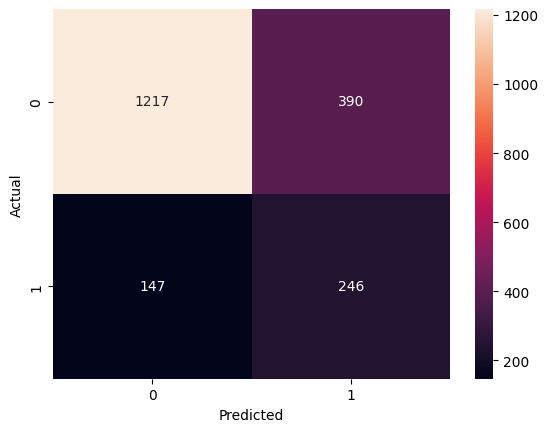

In [14]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()